### Multivariate regression

Up until now we have explored simple linear regression (SLR).
SLR supposed a the conditional distribution of a random variable Y has a Normal distribution where the mean is a function of a random variable X and the variance is constant.

But often there may be many variables that change the probability distribution of Y.

Multivariate Linear Regression (MLR) is a statistical model that relates more than one random variable X (called covariates) to Y.

We will first rewrite SLR using a centered $X$ random variable $X*$ to simplify maximum likelihood estimates of $\beta_{0}$, $\beta_{1}$. Next, we will rewrite these MLEs using matrix algebra. Finally, we generalize these MLE estimating equations to more than one variable $X$. 

#### Centering on X

Our typical SLR setup assumes a dataset of $x,y$ pairs generated from pairs of random variables and a specific probability distribution for $Y$. Suppose we collect a sample of $N$ data points $\mathcal{D} = [(x_{1},y_{1}),(x_{2},y_{2}),\cdots,(x_{n},y_{n})]$ which are generated from $N$ pairs of random variables $(X,Y)$.

SLR supposes the following conditional probability distriution for $Y$

\begin{align}
    Y|x,\beta,\sigma^{2} \sim \mathcal{N}\left(\beta_{0}+\beta_{1}x,\sigma^{2}\right)
\end{align}
or
\begin{align}
    Y_{i} =  \beta_{0}+\beta_{1}x_{i} + \epsilon_{i}\\
    \epsilon_{i} \sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align}

Lets change the above SLR model by creating a new variable $x*$by subtracting from each $x_{i}$ the sample average $\bar{x}$.
This is called centering on x and $x^{*}_{i} = x_{i} - \bar{x}$ is called a centered covariate.

The SLR model relating $x^{*}$ and $Y$ is then 

\begin{align}
    Y_{i} =  \beta_{0}+\beta_{1}x^{*}_{i} + \epsilon_{i}\\
    \epsilon_{i} \sim \mathcal{N}\left(0,\sigma^{2}\right)
\end{align}

We can visualize the effect of centering below

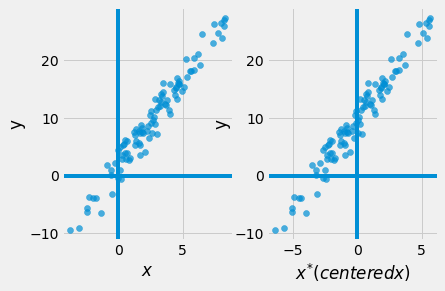

In [60]:
x     = np.random.normal(3,3,100) # generate 1000 points
xbar  = np.mean(x)
xstar = x-xbar

epsilons = np.random.normal(0,2,100)

y= 2+3*x + epsilons


fig,axs =plt.subplots(1,2) 
ax=axs[0]
ax.scatter(x,y,alpha=0.7)
ax.set(xlabel=r"$x$",ylabel="y")

ax.axvline(0)
ax.axhline(0)


ax=axs[1]
ax.scatter(xstar,y,alpha=0.7)
ax.set(xlabel=r"$x^{*} (centered x)$",ylabel="y")


ax.axvline(0)
ax.axhline(0)

By centering, all of the (x,y) pairs in this particular case move to the left.



In our original SLR, we can compute the MLEs for $\beta_{0}$ and $\beta_{1}$ as 

\begin{align}
    \hat{\beta_{0}} &= \bar{y} - \beta_{1}\bar{x}\\
    \hat{\beta_{1}} &= \frac{ \sum_{i=1}^{N}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}} = \frac{ \sum_{i=1}^{N}(x_{i}-\bar{x})y_{i}}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}
\end{align}

Our new SLR model where we center $x$ simplifies the above estimates
\begin{align}
    \hat{\beta_{0}^{*}} &= \bar{y}\\
    \hat{\beta_{1}^{*}} &= \frac{ \sum_{i=1}^{N}x^{*}_{i}y_{i}}{\sum_{i=1}^{N}(x^{*}_{i})^{2}}
\end{align}

Above we used the (very handy) fact that 

\begin{align}
   \bar{x^{*}} &= \frac{\sum_{i=1}^{N}(x_{i} - \bar{x})}{N}\\
               &= \frac{1}{N} \left( \sum_{i=1}^{N} x_{i} - \sum_{i=1}^{N}\bar{x}\right)\\
               &= \frac{1}{N} \left( \sum_{i=1}^{N} x_{i} - N\bar{x}\right)\\
               &= \frac{1}{N} \left( N\bar{x} - N\bar{x}\right)\\
               &=0
\end{align}



#### Are $\beta_{1}$ and $\beta_{1}^{*}$ equivalent?

Shifting all of our collected xvalues by the same constant does not change the relationship between Y and X.
We can see that this is the case two ways. 

###### Algebraic
\begin{align}
    Y_{i} &=  \beta^{*}_{0}+\beta^{*}_{1}x^{*}_{i} + \epsilon_{i}\\
          &=  \beta^{*}_{0}+\beta^{*}_{1}(x_{i}-\bar{x}) + \epsilon_{i}\\
          &=  \beta^{*}_{0}-\beta^{*}_{1}\bar{x} + \beta^{*}_{1}x_{i} + \epsilon_{i}\\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right)\\
\end{align}

We see that our $\beta_{1}^{*}$ is attached to $x$ in the same way as our original SLR.
This then means $\beta_{1}^{*} = \beta_{1}$

###### Visually
We can plot the points $(x,y)$ and $(x^{*},y)$ and see that the estimated **slope** remains unchanged.

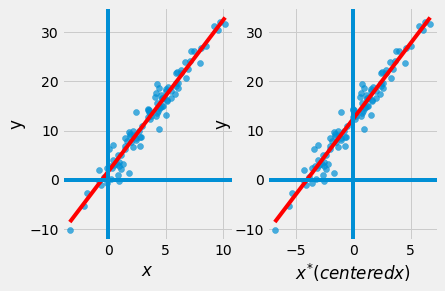

In [61]:
x     = np.random.normal(3,3,100) # generate 1000 points
xbar  = np.mean(x)
xstar = x-xbar

epsilons = np.random.normal(0,2,100)

y= 2+3*x + epsilons

fig,axs =plt.subplots(1,2) 
ax=axs[0]
ax.scatter(x,y,alpha=0.7)
ax.set(xlabel=r"$x$",ylabel="y")

minx,maxx = min(x),max(x)
b1,b0 = np.polyfit(x,y,1)
ax.plot([minx,maxx],[b0+b1*minx,b0+b1*maxx],color="red" )

ax.axvline(0)
ax.axhline(0)

ax=axs[1]
ax.scatter(xstar,y,alpha=0.7)
ax.set(xlabel=r"$x^{*} (centered x)$",ylabel="y")

minx,maxx = min(xstar),max(xstar)
b1,b0 = np.polyfit(xstar,y,1)
ax.plot([minx,maxx],[b0+b1*minx,b0+b1*maxx],color="red" )

ax.axvline(0)
ax.axhline(0)

#### Are $\beta_{0}$ and $\beta_{0}^{*}$ equivalent?

The intercept for the SLR and SLR with centered $x$ are **different**.

From above, we saw that the SLR with centered x simplifed to
###### Algebraic
\begin{align}
    Y_{i} &=  \beta^{*}_{0}-\beta^{*}_{1}\bar{x} + \beta^{*}_{1}x_{i} + \epsilon_{i}\\
    \epsilon_{i} &\sim \mathcal{N}\left(0,\sigma^{2}\right)\\
\end{align}

The expression $\beta^{*}_{0}-\beta^{*}_{1}\bar{x}$ involve only constants.
This expression is $\beta_{0}$. That is, $\beta_{0} = \beta^{*}_{0}-\beta^{*}_{1}\bar{x}$

###### Visually
We see from above that the estimated regression line (red line) intersects the y-axis at different points depending on whether we center or do not center our data.

Though centering makes computing MLEs easier this process also changes our $\beta_{0}$ or y-intercept.

### Matrix algebra to compute the MLEs for centered SLR

Let us look again at the MLE estimates for sentered SLR

\begin{align}
    \hat{\beta_{0}^{*}} &= \bar{y} \\
    \hat{\beta_{1}^{*}} &= \frac{ \sum_{i=1}^{N}x^{*}_{i}y_{i}}{\sum_{i=1}^{N}(x^{*}_{i})^{2}}
\end{align}

The MLE for $\hat{\beta_{1}^{*}}$ appears to be two inner products divided by one another. 
That is, we can compute $\hat{\beta_{1}^{*}}$ as 

\begin{align}
    \hat{\beta_{1}^{*}} = \frac{x^{*} \cdot y}{x^{*} \cdot x^{*} }
\end{align}

where $x \cdot y = \sum_{i=1}^{N}x_{i}y_{i}$ and 

\begin{align}
        x = \begin{bmatrix}
                        x_{1}\\
                        x_{2}\\
                        x_{3}\\
                        \vdots\\
                        x_{N}
                      \end{bmatrix} \; \; 
        y = \begin{bmatrix}
                        y_{1}\\
                        y_{2}\\
                        y_{3}\\
                        \vdots\\
                        y_{N}
                      \end{bmatrix}
\end{align}              

We can also recognize the MLE for $\hat{\beta^{*}_{0}}$ as an inner product
\begin{align}
    \hat{\beta_{0}^{*}} &= \bar{y} \\
                        &= \frac{1}{N} \sum_{i=1}^{N} y_{i}\\
                        &= \frac{1}{N} \sum_{i=1}^{N} 1 \times y_{i}\\
                        &= \frac{1}{N} \mathbb{1} \cdot y
\end{align}
where 

\begin{align}
        \mathbb{1} = \begin{bmatrix}
                        1\\
                        1\\
                        1\\
                        \vdots\\
                        1
                      \end{bmatrix}
\end{align}   

Using matrix algebra, our MLEs become

\begin{align}
    \hat{\beta_{0}^{*}} &= (\mathbb{1} \cdot \mathbb{1})^{-1} (\mathbb{1} \cdot y) \\ 
    \hat{\beta_{1}^{*}} &= (x^{*} \cdot x^{*})^{-1} (x^{*} \cdot y )
\end{align}


#### A data setup such that we arrive at the above MLEs

The above MLE estimates pop out of the following data setup. 
Let $X$ be a matrix with $N$ rows and $2$ columns. 
The first column will be all ones and the second column will be filled, from top to bottom, with $x_{1},x_{2},\cdots,x_{N}$. 

\begin{equation}
    X = \begin{bmatrix}
            1 & x_{1} \\ 
            1 & x_{2} \\ 
            1 & x_{3} \\ 
            \vdots & \vdots \\ 
            1 & x_{N} \\ 
        \end{bmatrix}
\end{equation}

The above MLE formulas may motivate us to try 

\begin{align}
    (X'X)^{-1} X'y
\end{align}


\begin{align}
    X'y = \begin{bmatrix}
            1     & 1 & 1  & \cdots  &1 \\
            x_{1} & x_{2} & x_{3} & \cdots &x_{N}\\
        \end{bmatrix} \times
        \begin{bmatrix}
                        y_{1}\\
                        y_{2}\\
                        y_{3}\\
                        \vdots\\
                        y_{N}
                      \end{bmatrix} = 
                      \begin{bmatrix}
                          \mathbb{1}' y \\
                          x'y
                      \end{bmatrix}
\end{align}

The first multiplication looks like a step in the right direction. 


\begin{align}
    X'X = \begin{bmatrix}
            1     & 1 & 1  & \cdots  &1 \\
            x_{1} & x_{2} & x_{3} & \cdots &x_{N}\\
        \end{bmatrix} \times
        \begin{bmatrix}
            1 & x_{1} \\ 
            1 & x_{2} \\ 
            1 & x_{3} \\ 
            \vdots & \vdots \\ 
            1 & x_{N} \\ 
        \end{bmatrix} = 
        \begin{bmatrix}
            \mathbb{1}'\mathbb{1} & \mathbb{1}'x\\
             \mathbb{1}'x         & x'x\\
        \end{bmatrix}
\end{align}

If we centered our x covariate then $\bar{x}$ is zero and so 

\begin{align}
    \mathbb{1}'x = \sum_{i=1}^{N} x_{i} =N\bar{x} = 0
\end{align}

We can use the above to simplify $X'X$

\begin{align}
    X'X = 
        \begin{bmatrix}
            \mathbb{1}'\mathbb{1} & 0\\
             0         & x'x\\
        \end{bmatrix}
\end{align}

The matrix $X'X$ is now a diagonal matrix---a matrix with non-zero elements for the entries $(i,i)$.
The inverse of a diagonal matrix is easy to compute

\begin{align}
    (X'X)^{-1} = 
        \begin{bmatrix}
            1 \Big/ \mathbb{1}'\mathbb{1} & 0\\
             0         & 1 \Big/ x'x\\
        \end{bmatrix}
\end{align}

and we can now see our final product is 

\begin{align}
    (X'X)^{-1}X'y =
        \begin{bmatrix}
            1 \Big/ \mathbb{1}'\mathbb{1} & 0\\
             0         & 1 \Big/ x'x\\
        \end{bmatrix}
           %
        \begin{bmatrix}
            \mathbb{1}' y \\
            x'y
         \end{bmatrix} = 
         \begin{bmatrix}
            \mathbb{1}' y \Big/ \mathbb{1}'\mathbb{1} \\ 
            x'y\Big/ x'x
         \end{bmatrix}
\end{align}

We can see that the above matrix multiplication returns a vector with two MLEs: $\hat{\beta^{*}_{0}}$ and $\hat{\beta^{*}_{1}}$. 



#### Variance for the MLEs follows a similar pattern. 

We saw in simple linear regression that the variance for $\hat{\beta_{1}}$ was 

\begin{equation}
    \mathbb{V}(\hat{\beta_{1}})= \sigma^{2}\frac{1}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}}
\end{equation}

and the variance for $\hat{\beta_{0}}$

\begin{equation}
    \mathbb{V}(\hat{\beta_{0}})= \sigma^{2}\left( \frac{1}{N} + \frac{1}{\sum_{i=1}^{N}(x_{i}-\bar{x})^{2}} \right)
\end{equation}

There is a natural generaliztion for the variance of $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ like the above generaliztion for the MLEs. 

\begin{equation}
    \mathbb{V}(\hat{\beta}) = \sigma^{2}(X'X)^{-1}
\end{equation}

The above variance will return a **covariance matrix** where the variance of $\hat{beta_{0}}$ is the first diagonal entry and the variance of $\hat{\beta_{1}}$ is the second diagonal entry. 

### Multivariate Linear Regression (finally) and an example

Suppose we collect data points
\begin{equation}
    \mathcal{D} = [ (x^{1}_{1},x^{2}_{1},x^{3}_{1},y_{1}),(x^{1}_{2},x^{2}_{2},x^{3}_{2},y_{2}),\cdots,(x^{1}_{N},x^{2}_{N},x^{3}_{N},y_{N})  ]
\end{equation}

and propose that the conditional distribution of $Y_{i}$ is
\begin{align}
    Y_{i} | x_{i}^{1},x_{i}^{2},\cdots,x_{i}^{3} \sim \mathcal{N}\left( \beta_{0} + \beta_{1}x_{i}^{1}+ \beta_{2}x_{i}^{2}+ \beta_{3}x_{i}^{3}, \sigma^{2} \right)
\end{align}

The above is **multivariate linear regression** model. 
We can compute the MLE for $\hat{\beta}$ as 

\begin{equation}
    \hat{\beta} = (X'X)^{-1}X'y
\end{equation}

and we can compute the variance for our MLEs as 

\begin{equation}
    \mathbb{V}(\hat{\beta}) = \sigma^{2}(X'X)^{-1}
\end{equation}

In [62]:
from sklearn.datasets import load_diabetes 
import numpy.linalg as la


diabData = load_diabetes()
X = diabData["data"]
y = diabData["target"]

# add intercept (column of ones)
X = np.column_stack([np.ones((len(X),1)),X]  )

In [63]:
betaHat = la.solve( X.T.dot(X), X.T.dot(y))
betaHat

epsilons = y - X.dot(betaHat)
sigma2Hat = epsilons.T.dot(epsilons) / len(epsilons)

varBetaHat = sigma2Hat * la.inv(X.T.dot(X))

In [64]:
import statsmodels.api as sm
model = sm.OLS(y,X)
res = model.fit().summary()
res

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 26 Oct 2021   Prob (F-statistic):           3.83e-62
Time:                        00:27:29   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
x1           -10.0122     59.749     -0.168      0.867    -127.448     107.424
x2          -239.8191     61.222     -3.917      0.000    -360.151    -119.488
x3           519.8398     66.534      7.813      0.000     389.069     650.610
x4           324.3904     65.422      4.958      0.000     195.805     452.976
x5          -792.1842    416.684     -1.901      0.058   -1611.169      26.801
x6           476.7458    339.035      1.406      0.160    -189.621    1143.113
x7           101.0446    212.533      0.475      0.635    -316.685     518.774
x8           177.0642    161.476      1.097      0.273    -140.313     494.442
x9           751.2793    171.902      4.370      0.000     413.409    1089.150
x10           67.6254     65.984      1.025      0.306     -62.065     197.316
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
print(betaHat[1])
print(np.sqrt(varBetaHat[1,1]))

-10.012197817471035
59.00101633853383
